<a href="https://colab.research.google.com/github/andhikaaria/MachineLearning/blob/main/mgg5/EDA_dengan_dataset_lainnya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Andhika Aria Pratama Nugraha
#1103202121
#Tugas ke mgg5

In [564]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



In [565]:
from google.colab import drive  # Mengimpor modul yang diperlukan untuk mengakses Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [566]:
#Membaca file dan mengubah ke dataframe
file_path = '/content/drive/My Drive/Dataset/disbun-2-2-od_18583_luas_tnmn_thnan_perkebunan_besar_negara_komoditi_karet_data.csv'
df = pd.read_csv(file_path)
df.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kondisi_tanaman,luas_tanaman,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,TBM,0,HEKTAR,2016
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,TM,0,HEKTAR,2016
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,TR/TTM,0,HEKTAR,2016
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,TBM,849,HEKTAR,2016
4,5,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,TM,4015,HEKTAR,2016


In [567]:
# Menghitung jumlah nilai unik dalam setiap kolom (axis=0) pada DataFrame house
print(df.nunique(axis=0))

id                     567
kode_provinsi            1
nama_provinsi            1
kode_kabupaten_kota     27
nama_kabupaten_kota     27
kondisi_tanaman          3
luas_tanaman           100
satuan                   1
tahun                    7
dtype: int64


In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   567 non-null    int64 
 1   kode_provinsi        567 non-null    int64 
 2   nama_provinsi        567 non-null    object
 3   kode_kabupaten_kota  567 non-null    int64 
 4   nama_kabupaten_kota  567 non-null    object
 5   kondisi_tanaman      567 non-null    object
 6   luas_tanaman         567 non-null    int64 
 7   satuan               567 non-null    object
 8   tahun                567 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 40.0+ KB


In [569]:
# Menggunakan fungsi rename() untuk mengganti garis bawah dengan spasi
df.rename(columns=lambda x: x.replace('_', ' '), inplace=True)

In [570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   567 non-null    int64 
 1   kode provinsi        567 non-null    int64 
 2   nama provinsi        567 non-null    object
 3   kode kabupaten kota  567 non-null    int64 
 4   nama kabupaten kota  567 non-null    object
 5   kondisi tanaman      567 non-null    object
 6   luas tanaman         567 non-null    int64 
 7   satuan               567 non-null    object
 8   tahun                567 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 40.0+ KB


In [571]:
# Menghitung jumlah nilai null (NaN) dalam setiap kolom DataFrame house
df.isnull().sum()

id                     0
kode provinsi          0
nama provinsi          0
kode kabupaten kota    0
nama kabupaten kota    0
kondisi tanaman        0
luas tanaman           0
satuan                 0
tahun                  0
dtype: int64

In [572]:
df.describe()

,id,kode provinsi,kode kabupaten kota,luas tanaman,tahun
count,567.000000,567.0,567.000000,567.000000,567.000000
mean,284.000000,32.0,3231.333333,234.507937,2019.000000
std,163.823075,0.0,31.229403,694.058031,2.001766
min,1.000000,32.0,3201.000000,0.000000,2016.000000
25%,142.500000,32.0,3207.000000,0.000000,2017.000000
50%,284.000000,32.0,3214.000000,0.000000,2019.000000
75%,425.500000,32.0,3273.000000,0.000000,2021.000000
max,567.000000,32.0,3279.000000,4264.000000,2022.000000


In [573]:
df.head()

,id,kode provinsi,nama provinsi,kode kabupaten kota,nama kabupaten kota,kondisi tanaman,luas tanaman,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,TBM,0,HEKTAR,2016
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,TM,0,HEKTAR,2016
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,TR/TTM,0,HEKTAR,2016
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,TBM,849,HEKTAR,2016
4,5,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,TM,4015,HEKTAR,2016


In [574]:
# Menghapus kolom 'id' dan 'kode provinsi' dari DataFrame
df.drop('id', inplace=True, axis=1)
df.drop('kode provinsi', inplace=True, axis=1)

In [575]:
# Menghitung jumlah nilai 0 dalam kolom 'luas tanaman' dan 'tahun'
luas_tanaman = (df['luas tanaman'] == 0).sum()
tahun = (df.tahun == 0).sum()

# Mencetak hasil perhitungan jumlah nilai 0
print("Nilai 0 di kolom luas tanaman ada: ", luas_tanaman)
print("Nilai 0 di kolom tahun: ", tahun)

Nilai 0 di kolom luas tanaman ada:  447
Nilai 0 di kolom tahun:  0


In [576]:
# Menghapus baris dengan nilai 0 pada kolom 'jumlah pendapatan'
house = df.loc[(df[['luas tanaman']]!=0).all(axis=1)]

tbm: menyatakan status kondisi tanaman dengan kategori tanaman belum menghasilkan. tbm ini akan diganti dengan nilai 0 sebagai indikator belum menghasilkan produk.

tm: menyatakan status kondisi tanaman dengan kategori tanaman menghasilkan. tm ini akan diganti dengan nilai 1 sebagai indikator sudah menghasilkan produk.

tr/ttm: menyatakan status kondisi tanaman dengan kategori tanaman rusak/tanaman tidak menghasilkan. tbm ini akan diganti dengan nilai 0 sebagai indikator tidak menghasilkan produk.

In [577]:
# Mengganti nilai sesuai dengan kriteria dan menyimpannya dalam kolom baru
df['kondisi baru'] = df['kondisi tanaman'].replace({'TBM': 0, 'TM': 1, 'TR/TTM': 0})

# Mengganti semua string dengan nilai 0 dalam kolom "kondisi tanaman"
df['kondisi baru'].replace(to_replace='[A-Za-z]', value=0, regex=True, inplace=True)


In [578]:
# Mengecek tipe data dalam kolom "kondisi tanaman" dan menghitung jumlahnya
jumlah_int = df['kondisi tanaman'].apply(lambda x: 1 if isinstance(x, int) else 0).sum()
jumlah_str = df['kondisi tanaman'].apply(lambda x: 1 if isinstance(x, str) else 0).sum()

# Hasilnya:
print(f"Jumlah nilai integer: {jumlah_int}")
print(f"Jumlah nilai string: {jumlah_str}")

Jumlah nilai integer: 0
Jumlah nilai string: 567


In [579]:
df.isnull().sum()

nama provinsi          0
kode kabupaten kota    0
nama kabupaten kota    0
kondisi tanaman        0
luas tanaman           0
satuan                 0
tahun                  0
kondisi baru           0
dtype: int64

In [580]:
df.head()

,nama provinsi,kode kabupaten kota,nama kabupaten kota,kondisi tanaman,luas tanaman,satuan,tahun,kondisi baru
0,JAWA BARAT,3201,KABUPATEN BOGOR,TBM,0,HEKTAR,2016,0
1,JAWA BARAT,3201,KABUPATEN BOGOR,TM,0,HEKTAR,2016,1
2,JAWA BARAT,3201,KABUPATEN BOGOR,TR/TTM,0,HEKTAR,2016,0
3,JAWA BARAT,3202,KABUPATEN SUKABUMI,TBM,849,HEKTAR,2016,0
4,JAWA BARAT,3202,KABUPATEN SUKABUMI,TM,4015,HEKTAR,2016,1


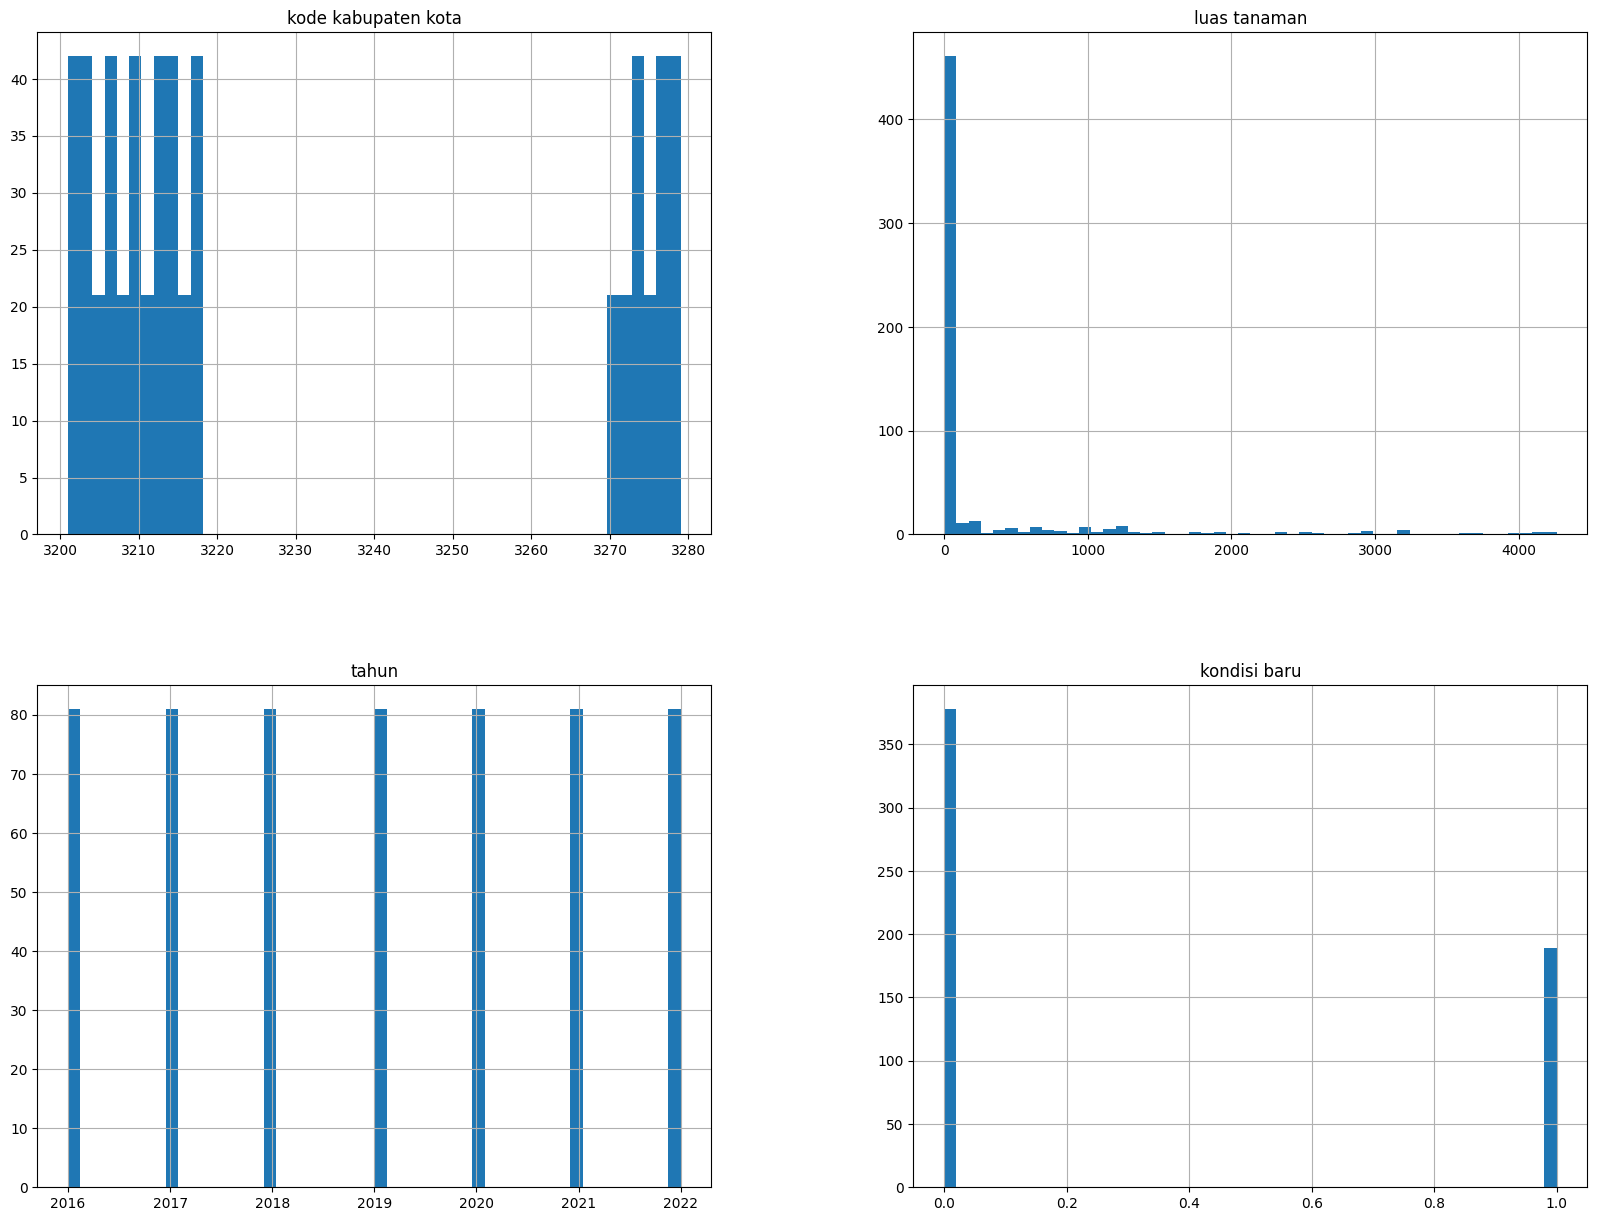

In [581]:
# Menggambar histogram untuk masing-masing kolom dalam DataFrame 'jumlah pendapatan'
df.hist(bins=50, figsize=(20,15))
plt.show()

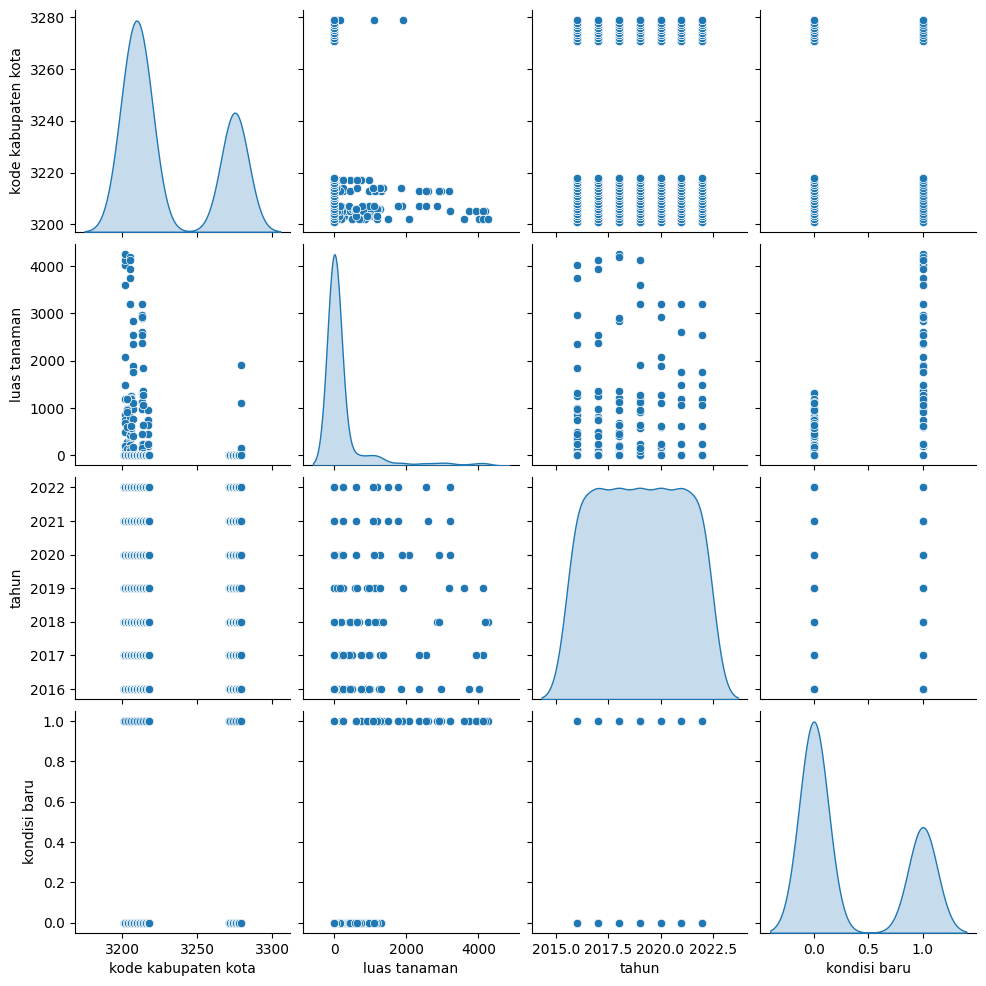

In [582]:
# Menggambar pair plot menggunakan Seaborn dengan estimasi Kernel Density Plot (KDE) pada diagonal
sns.pairplot(df, diag_kind='kde')

<ipython-input-583-365ec5a75930>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix')

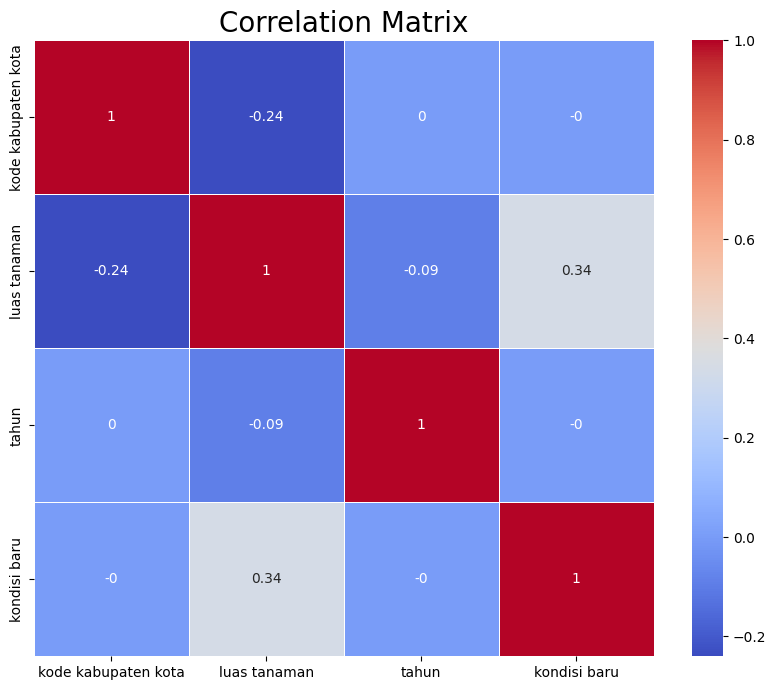

In [583]:
# Membuat gambar plot dengan ukuran 10x8
plt.figure(figsize=(10, 8))

# Menghitung matriks korelasi antar fitur dan membulatkannya ke 2 desimal
correlation_matrix = df.corr().round(2)

# Menggambar heatmap korelasi dengan parameter 'annot=True' untuk menampilkan nilai dalam persegi
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Memberi judul pada plot
plt.title("Correlation Matrix", size=20)

In [584]:
df.head()

,nama provinsi,kode kabupaten kota,nama kabupaten kota,kondisi tanaman,luas tanaman,satuan,tahun,kondisi baru
0,JAWA BARAT,3201,KABUPATEN BOGOR,TBM,0,HEKTAR,2016,0
1,JAWA BARAT,3201,KABUPATEN BOGOR,TM,0,HEKTAR,2016,1
2,JAWA BARAT,3201,KABUPATEN BOGOR,TR/TTM,0,HEKTAR,2016,0
3,JAWA BARAT,3202,KABUPATEN SUKABUMI,TBM,849,HEKTAR,2016,0
4,JAWA BARAT,3202,KABUPATEN SUKABUMI,TM,4015,HEKTAR,2016,1


In [585]:
print(house.columns)

Index(['nama provinsi', 'kode kabupaten kota', 'nama kabupaten kota',
       'kondisi tanaman', 'luas tanaman', 'satuan', 'tahun'],
      dtype='object')


In [586]:
# Memilih fitur-fitur yang akan digunakan sebagai variabel independen (X)
X = df[['luas tanaman', 'tahun']]

# Memilih variabel dependen (y), yang dalam hal ini adalah 'kondisi tanaman'
y = df['kondisi baru']

In [587]:
# Memisahkan data menjadi data latih dan data uji
# X_train dan y_train adalah data latih, X_test dan y_test adalah data uji
# test_size = 0.1 menunjukkan bahwa 10% dari data akan digunakan sebagai data uji
# random_state digunakan untuk mengontrol randomization agar hasilnya dapat direproduksi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)


In [588]:
print(f'Total # sampel di seluruh dataset: {len(X)}')
print(f'Total # sampel di seluruh dataset: {len(X_train)}')
print(f'Total # sampel di seluruh datasett: {len(X_test)}')

Total # sampel di seluruh dataset: 567
Total # sampel di seluruh dataset: 510
Total # sampel di seluruh datasett: 57


In [589]:
# Mengidentifikasi fitur-fitur numerik yang akan dinormalisasi
numerical_features = ['luas tanaman', 'tahun']

# Menerapkan StandardScaler untuk melakukan normalisasi pada data latih
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])

# Menampilkan lima baris pertama dari data latih yang telah dinormalisasi
X_train[numerical_features].head()

,luas tanaman,tahun
533,-0.334195,1.505659
223,-0.334195,-0.499265
424,2.299195,1.004428
398,-0.334195,0.503197
162,-0.334195,-0.499265


In [590]:
#cek nilai rata-rata (mean) dan standar deviasi (std) setelah di standarisasi
X_train[numerical_features].describe().round(4)

,luas tanaman,tahun
count,510.0000,510.0000
mean,-0.0000,-0.0000
std,1.0010,1.0010
min,-0.3342,-1.5017
25%,-0.3342,-1.0005
50%,-0.3342,0.0020
75%,-0.3342,1.0044
max,6.0277,1.5057


In [591]:
#Scaling data uji
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [592]:
dtr = DecisionTreeRegressor(random_state=42)

In [593]:
df.head()

,nama provinsi,kode kabupaten kota,nama kabupaten kota,kondisi tanaman,luas tanaman,satuan,tahun,kondisi baru
0,JAWA BARAT,3201,KABUPATEN BOGOR,TBM,0,HEKTAR,2016,0
1,JAWA BARAT,3201,KABUPATEN BOGOR,TM,0,HEKTAR,2016,1
2,JAWA BARAT,3201,KABUPATEN BOGOR,TR/TTM,0,HEKTAR,2016,0
3,JAWA BARAT,3202,KABUPATEN SUKABUMI,TBM,849,HEKTAR,2016,0
4,JAWA BARAT,3202,KABUPATEN SUKABUMI,TM,4015,HEKTAR,2016,1


In [594]:
# Melatih model Decision Tree Regressor menggunakan data latih
dtr.fit(X_train, y_train)

# Menghitung skor (R-squared) dari model pada data latih
score_dtr = dtr.score(X_train, y_train)

# Menampilkan skor model
print("Skor Decision Tree Regressor pada data latih:", score_dtr)


Skor Decision Tree Regressor pada data latih: 0.2626956180963502


In [595]:
rfr = RandomForestRegressor(n_estimators=500)

In [596]:
rfr.fit(X_train,y_train)
score_rfr = rfr.score(X_train,y_train)
print(score_rfr)

0.24901290833808287


In [597]:
# Membuat model K-Nearest Neighbors Regressor dengan 2 tetangga
knr = KNeighborsRegressor(n_neighbors=2)

In [598]:
# Melatih model K-Nearest Neighbors Regressor
knr.fit(X_train, y_train)

# Menghitung dan mencetak skor kesesuaian model terhadap data pelatihan
score_knr = knr.score(X_train, y_train)
print(score_knr)

-0.4593176972281452


In [599]:
# Buat DataFrame untuk menyimpan nilai RMSE
rmse = pd.DataFrame(columns=['train', 'test'], index=['DTR', 'RFR', 'KNR'])

# Dictionary model-model yang akan diuji
model_dict = {'DTR': dtr, 'RFR': rfr, 'KNR': knr}

# Loop melalui setiap model untuk menghitung RMSE pada data pelatihan dan pengujian
for name, model in model_dict.items():
    rmse.loc[name, 'train'] = np.sqrt(mean_squared_error(y_true=y_train, y_pred=model.predict(X_train)) / 1e3)
    rmse.loc[name, 'test'] = np.sqrt(mean_squared_error(y_true=y_test, y_pred=model.predict(X_test)) / 1e3)

# Tampilkan nilai RMSE
rmse


,train,test
DTR,0.012891,0.012893
RFR,0.01301,0.013199
KNR,0.018136,0.017893


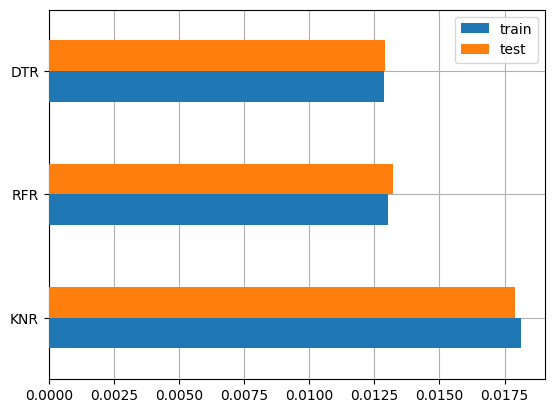

In [600]:
fig, ax = plt.subplots()

# Mengurutkan DataFrame berdasarkan nilai RMSE pada data pengujian dalam urutan menurun
rmse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)

# Menambahkan grid pada plot
ax.grid(zorder=0)


In [601]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_DTR,prediksi_RFR,prediksi_KNR
427,1,0.2,0.2,0.5
